In [144]:
import os
import numpy as np
from IPython.display import HTML
import re
from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission,
    sample_sonnet_line,
    obs_map_reverser
)

In [145]:
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

# Working On Ryhming dictinoary

In [146]:
f2 = open('data/shakespeare.txt', 'r')

In [147]:
f2 = open('data/shakespeare.txt', 'r')
sonnets = []
sonnet = []
while True:
    line = f2.readline()
    if line == '':
        break
        
    if is_number(line):
        sonnets.append(sonnet)
        sonnet = []
    else:
        sonnet.append(line)
sonnets.append(sonnet)    
sonnets = sonnets[1:]

# for sonnet in sonnets:
#     for i in range(len(sonnet)):
#         if i != len(sonnet) - 1:
#             sonnet[i] = sonnet[i][:-2]
#         else:
#             sonnet[i] = sonnet[i][:-1]

sonnets = [[line for line in sonnet if line != []] for sonnet in sonnets]
sonnets = [[line.split() for line in sonnet] for sonnet in sonnets]
sonnets = [[line for line in sonnet if line != []] for sonnet in sonnets]
sonnets = [[line for line in sonnet] for sonnet in sonnets if len(sonnet) == 14]

for s in range(len(sonnets)):
    for l in range(len(sonnets[s])):
        if sonnets[s][l][-1][-1] in [',', '.', '?', '!', ':', '\'' ,')', ';']:
            sonnets[s][l][-1] = sonnets[s][l][-1][:-1]
            
for s in range(len(sonnets)):
    for l in range(len(sonnets[s])):
        if sonnets[s][l][-1][-1] in [',', '.', '?', '!', ':','\'', ')', ';']:
            sonnets[s][l][-1] = sonnets[s][l][-1][:-1]




In [148]:
r_dic = dict()
for sonnet in sonnets:
    for i in range(len(sonnet)):
        end = sonnet[i][-1]
        if not (end in r_dic.keys()):
                r_dic[end] = []
        
        
        
        
        
    r_dic[sonnet[0][-1]].append(sonnet[2][-1])
    r_dic[sonnet[2][-1]].append(sonnet[0][-1])

    r_dic[sonnet[1][-1]].append(sonnet[3][-1])
    r_dic[sonnet[3][-1]].append(sonnet[1][-1])
    
    
    
    r_dic[sonnet[4][-1]].append(sonnet[6][-1])
    r_dic[sonnet[6][-1]].append(sonnet[4][-1])
    
    r_dic[sonnet[5][-1]].append(sonnet[7][-1])
    r_dic[sonnet[7][-1]].append(sonnet[5][-1])
    
    
    r_dic[sonnet[8][-1]].append(sonnet[10][-1])
    r_dic[sonnet[10][-1]].append(sonnet[8][-1])
    
    r_dic[sonnet[9][-1]].append(sonnet[11][-1])
    r_dic[sonnet[11][-1]].append(sonnet[9][-1])
    
    r_dic[sonnet[12][-1]].append(sonnet[13][-1])
    r_dic[sonnet[13][-1]].append(sonnet[12][-1])

for key in r_dic.keys():
    r_dic[key] = list(set(r_dic[key]))
r_dic

{'increase': ['decease', 'decrease', 'cease'],
 'die': ['memory', 'thereby', 'eye', 'dignity', 'lie'],
 'decease': ['lease', 'increase'],
 'memory': ['fortify', 'die', 'eternity', 'masonry', 'sky'],
 'eyes': ['arise',
  'spies',
  'lies',
  'devise',
  'prophecies',
  'cries',
  'despise'],
 'fuel': ['cruel'],
 'lies': ['subtleties', 'eyes'],
 'cruel': ['fuel', 'jewel'],
 'ornament': ['content'],
 'spring': ['sing', 'niggarding', 'king', 'thing'],
 'content': ['spent', 'ornament'],
 'niggarding': ['spring'],
 'be': ['thee', 'decree', 'I', 'idolatry', 'me', 'see'],
 'thee': ['melancholy',
  'thee',
  'usury',
  'free',
  'posterity',
  'be',
  'me',
  'see'],
 'brow': ['allow', 'mow', 'now'],
 'field': ['held'],
 'now': ['how', 'bow', 'brow', 'bough'],
 'held': ['field', 'stelled'],
 'days': ['lays', 'praise', 'decays'],
 'praise': ['days'],
 'use': ['muse', 'excuse', 'abuse'],
 'mine': ['thine', 'define', 'line', 'shine'],
 'excuse': ['use'],
 'thine': ['divine', 'shine', 'mine'],
 'ol

# Naive HMM Model

In [149]:
f = open('data/shakespeare.txt', 'r')

In [150]:
lines = []
for line in f:
    lines.append(line)
lines = [line.split() for line in lines if len(line.split()) > 1]

In [151]:
words = []
for line in lines:
    words += line

In [152]:
text = ''
for line in lines:
    for word in line:
        text += word + ' '

In [153]:
obs, obs_map = parse_observations(text)

In [154]:
f2 = open('data/Syllable_dictionary.txt')


words = [line.split() for line in f2]
for i in range(len(words)):
    
    words[i][0] = re.sub(r'[^\w]', '', words[i][0]).lower()
syls = {}
for word in words:
    if is_number(word[1]):
        syls[obs_map[word[0]]] = int(word[1])
    else:
        syls[obs_map[word[0]]] = int(word[2])

In [155]:
obs, obs_map = parse_observations(text)

In [156]:
hmm = unsupervised_HMM(obs, 8, 500, get_syls = True)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 110
Iteration: 120
Iteration: 130
Iteration: 140
Iteration: 150
Iteration: 160
Iteration: 170
Iteration: 180
Iteration: 190
Iteration: 200
Iteration: 210
Iteration: 220
Iteration: 230
Iteration: 240
Iteration: 250
Iteration: 260
Iteration: 270
Iteration: 280
Iteration: 290
Iteration: 300
Iteration: 310
Iteration: 320
Iteration: 330
Iteration: 340
Iteration: 350
Iteration: 360
Iteration: 370
Iteration: 380
Iteration: 390
Iteration: 400
Iteration: 410
Iteration: 420
Iteration: 430
Iteration: 440
Iteration: 450
Iteration: 460
Iteration: 470
Iteration: 480
Iteration: 490
Iteration: 500


In [157]:
hmm.syls = syls

In [162]:
sample_sonnet_line(hmm, obs_map, 10)

'Beauty bonds not suffers loveliness and...'

In [163]:
def get_naive_sonnet():
    sonnet1 = ''
    for i in range(14):
        if i % 4 ==0:
            sonnet1 += '\n'
        sonnet1 += sample_sonnet_line(hmm, obs_map, 10) + ',\n'
    return sonnet1

In [164]:
for i in range(5):
    print ('SONNET # ', (i+1))
    print (get_naive_sonnet() + '\n\n\n\n')

SONNET #  1

Desire clay some make thou see birth own grew...,
And is eyes for when such thou buds the love...,
Heir forgetst will thou she to this might i...,
To bids my sun give that i you and heaven...,

Thy are way doth all beloved mine a thy...,
Them old to silvered of wont was thy doth...,
As whilst in not self must ranged is deceive...,
Hymn pain by hers her enjoyed that the truth...,

But and one hath place in so with suffered...,
If give see straight ensconce moving by night...,
Embassy after my sun part doth thine...,
His that face is may i store in the grace...,

Me happy respect what is more use hied...,
All harder old of made hold none pity...,





SONNET #  2

On thou i a whose play may seemed my world...,
Hours kind her where write my our stormbeaten...,
But no bare for by placed and single...,
That not surmise will poesy thou as...,

State shame wrackful subject and in the world...,
Then when tongue weak they slanders stores much feelst...,
Them thee wrinkles own thoug

In [165]:
def rhyming_sonnet_line(hmm, obs_map, r_dic, word_to_rhyme, syl):
    obs_map_r = obs_map_reverser(obs_map)
    syl_count = 0
    
    emission = []
    states = []
    candidates = r_dic[word_to_rhyme]
    word_i = np.random.choice(candidates)
    word_i = re.sub(r'[^\w]', '', word_i).lower()


    
    emission_i = obs_map[word_i]
    
    state = np.random.choice(range(hmm.L))
    
    emission.append(emission_i)
    states.append(state)
    
    syl_count += int(hmm.syls[emission_i])
    
    while syl_count < syl:
        add = np.random.choice(range(hmm.D), p = hmm.O[state])
        add_syls = int(hmm.syls[add])
        if syl_count + add_syls <= syl:
            emission.append(add)
            syl_count += add_syls
            states.append(state)
            pr = list(np.array(hmm.A).transpose()[state])
            pr_sum = sum(pr)
            for i in range(len(pr)):
                pr[i] /= pr_sum
            state = np.random.choice(range(hmm.L), p = pr)
            
    emission.reverse()
    
    sentence = [obs_map_r[i] for i in emission]
    
    return sentence

In [166]:
def sonnet_line_ending_ryhme(hmm, obs_map, r_dic, syl):
    obs_map_r = obs_map_reverser(obs_map)


    
    emission = []
    states = []
    syl_count = 0
    state = np.random.choice(range(hmm.L))
    add = np.random.choice(range(hmm.D), p = hmm.O[state])
    emission.append(add)
    states.append(state)
    syl_count += int(hmm.syls[add])
    while syl_count < syl:
        add = np.random.choice(range(hmm.D), p = hmm.O[state])
        add_syls = int(hmm.syls[add])
        if syl_count + add_syls <= syl:
            emission.append(add)
            syl_count += add_syls
            state = np.random.choice(range(hmm.L), p = hmm.A[state])
            states.append(state)
    emission = emission[:-1]
    candidates = []
    for key in r_dic.keys():
        key1 = re.sub(r'[^\w]', '', key).lower()
        if int(hmm.syls[obs_map[key1]]) == add_syls:
            candidates.append(key1)
            
    end = np.random.choice(candidates)
    emission.append(obs_map[end])
    
    sentence = [obs_map_r[i] for i in emission]
    return sentence

In [167]:
rhyming_sonnet_line(hmm, obs_map, r_dic, 'gate', 10)

['worse', 'unjust', 'she', 'well', 'o', 'can', 'in', 'his', 'state']

In [168]:
sonnet_line_ending_ryhme(hmm, obs_map, r_dic, 10)

['my', 'heats', 'lively', 'nor', 'seat', 'when', 'thou', 'are', 'crave']

In [169]:
rhyming_sonnet_line(hmm, obs_map, r_dic, 'wrongs', 10)

['the', 'under', 'smell', 'are', 'ye', 'of', 'you', 'belongs']

In [170]:
def generate_rhyming_sonnet():
    sonnet = []
    
    sonnet.append(sonnet_line_ending_ryhme(hmm, obs_map, r_dic, 10))
    sonnet.append(sonnet_line_ending_ryhme(hmm, obs_map, r_dic, 10))
    
    sonnet.append(rhyming_sonnet_line(hmm, obs_map, r_dic, sonnet[0][-1], 10))
    sonnet.append(rhyming_sonnet_line(hmm, obs_map, r_dic, sonnet[1][-1], 10))
    
    
    
    sonnet.append(sonnet_line_ending_ryhme(hmm, obs_map, r_dic, 10))
    sonnet.append(sonnet_line_ending_ryhme(hmm, obs_map, r_dic, 10))
    
    sonnet.append(rhyming_sonnet_line(hmm, obs_map, r_dic, sonnet[4][-1], 10))
    sonnet.append(rhyming_sonnet_line(hmm, obs_map, r_dic, sonnet[5][-1], 10))
    
    
    sonnet.append(sonnet_line_ending_ryhme(hmm, obs_map, r_dic, 10))
    sonnet.append(sonnet_line_ending_ryhme(hmm, obs_map, r_dic, 10))
    
    sonnet.append(rhyming_sonnet_line(hmm, obs_map, r_dic, sonnet[8][-1], 10))
    sonnet.append(rhyming_sonnet_line(hmm, obs_map, r_dic, sonnet[9][-1], 10))
    
    
    sonnet.append(sonnet_line_ending_ryhme(hmm, obs_map, r_dic, 10))
    sonnet.append(rhyming_sonnet_line(hmm, obs_map, r_dic, sonnet[-1][-1], 10))
    
    result = ''
    for line in sonnet:
        for word in line:
            result += word + ' '
        result += '\n'
            
    return result


In [171]:
print(generate_rhyming_sonnet())

decrees which hell in unfathered bound fight 
thee the long of mayst uprear my face tear 
my thief and to my body the name light 
my day they grow thou with substance appear 
when than no out slavery part of art waste 
my my needs i therefore of shall life stone 
my friend must eyes although on love doth past 
as will travel their things she shall thing none 
like effectually fiend see such from brought 
thou all your winter let will if on can 
heart i a fairest away nor life thought 
self the thing all control kindhearted man 
is thee what me so do lovegod not chief 
my star to speak graces past living grief 



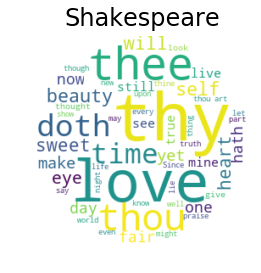

In [172]:
#Checking most used words in the text file
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

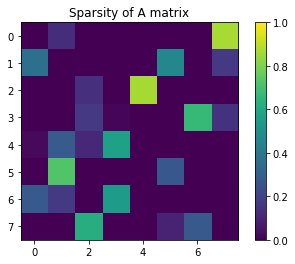

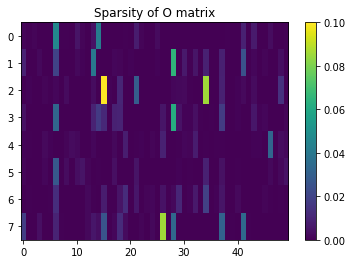

In [173]:
#Visualizing rough sparsity representation
visualize_sparsities(hmm, O_max_cols=50)

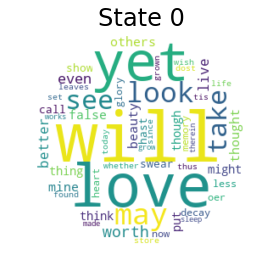

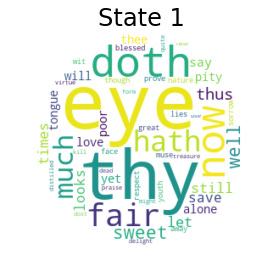

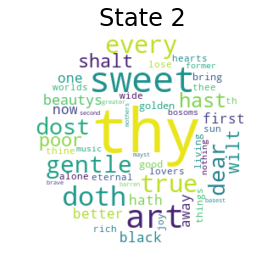

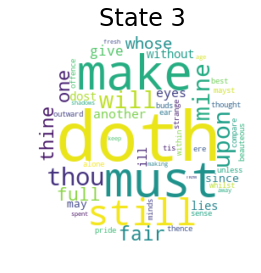

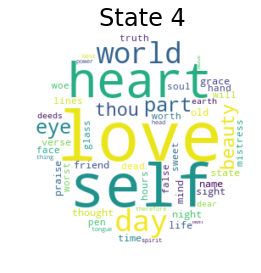

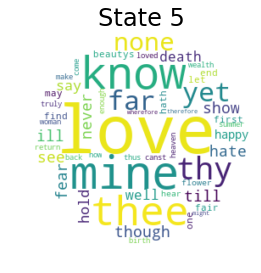

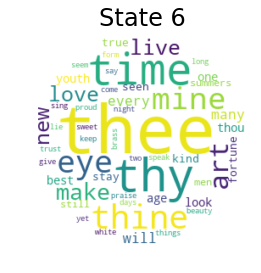

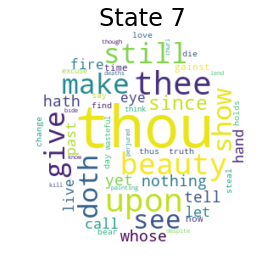

In [174]:
#FInding words that commonly associate with states
wordclouds = states_to_wordclouds(hmm, obs_map)

In [183]:
A_mat =np.array(hmm.A)
A_mat>0.25

array([[False, False, False, False, False, False, False,  True],
       [ True, False, False, False, False,  True, False, False],
       [False, False, False, False,  True, False, False, False],
       [False, False, False, False, False, False,  True, False],
       [False,  True, False,  True, False, False, False, False],
       [False,  True, False, False, False,  True, False, False],
       [ True, False, False,  True, False, False, False, False],
       [False, False,  True, False, False, False,  True, False]])